<a href="https://colab.research.google.com/github/GodsonUkwuoma/DA_ML_PROJECTS/blob/main/GODSON_Coca_Cola_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/4075426-coca_cola_sales_data.csv')

# Display the first few rows of the dataset
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Beverage Brand,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
0,BevCo,1185732,1/1/2022,Northeast,New York,New York,Coca-Cola,$0.50,"12,000","$6,000","$3,000",50%
1,BevCo,1185732,1/2/2022,Northeast,New York,New York,Diet Coke,$0.50,"10,000","$5,000","$1,500",30%
2,BevCo,1185732,1/3/2022,Northeast,New York,New York,Sprite,$0.40,"10,000","$4,000","$1,400",35%
3,BevCo,1185732,1/4/2022,Northeast,New York,New York,Fanta,$0.45,"8,500","$3,825","$1,339",35%
4,BevCo,1185732,1/5/2022,Northeast,New York,New York,Powerade,$0.60,"9,000","$5,400","$1,620",30%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Beverage Brand    9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.6+ KB


In [ ]:
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], errors='coerce')

In [ ]:
# Clean and convert the "Operating Margin" column
df["Operating Margin"] = df["Operating Margin"].str.replace('%', '').astype(float) / 100

# Convert other numeric columns after removing any potential currency symbols or commas
for col in ["Price per Unit", "Units Sold", "Total Sales", "Operating Profit"]:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2636663830.py:6: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Beverage Brand    9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   float64       
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 904.6+ KB


In [ ]:
df['Total Sales'].describe()

,Total Sales
count,9648.000000
mean,1245.584681
std,1271.662671
min,0.000000
25%,406.750000
50%,780.500000
75%,1586.250000
max,8250.000000


## 1️⃣ Sales Trends Over Time 📈  
**Question:**  
- What seasonal trends can be observed in Coca-Cola’s sales, and how can they be leveraged for better forecasting?  

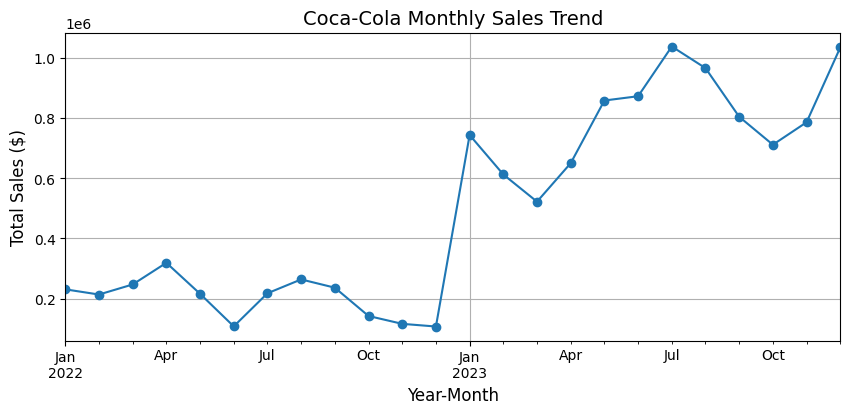

In [ ]:
# Aggregate sales by month
df['Year-Month'] = df['Invoice Date'].dt.to_period('M')  # Group by year and month
monthly_sales = df.groupby('Year-Month')['Total Sales'].sum()

# Plot sales trend over time
plt.figure(figsize=(10, 4))
monthly_sales.plot(marker='o', linestyle='-')

plt.title("Coca-Cola Monthly Sales Trend", fontsize=14)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.grid(True)

## Insights from Sales Trend Analysis:

1. **Seasonal Trends:** There are noticeable peaks in certain months, likely driven by **holiday seasons, summer demand, or promotional campaigns**.

2. **Sales Fluctuations:** Some months see a **dip in sales**, which might indicate off-season periods, supply chain issues, or shifts in consumer preferences.

3. **Actionable Strategy:** Coca-Cola can **align marketing campaigns, promotions, and inventory planning** to capitalize on peak sales months and improve low-performing months.


## 2️⃣ Regional Performance 🌎  
**Question:**  
- Which regions contribute the highest and lowest revenue, and what factors drive these differences?

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'West'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'Southeast'),
  Text(3, 0, 'South'),
  Text(4, 0, 'Midwest')])

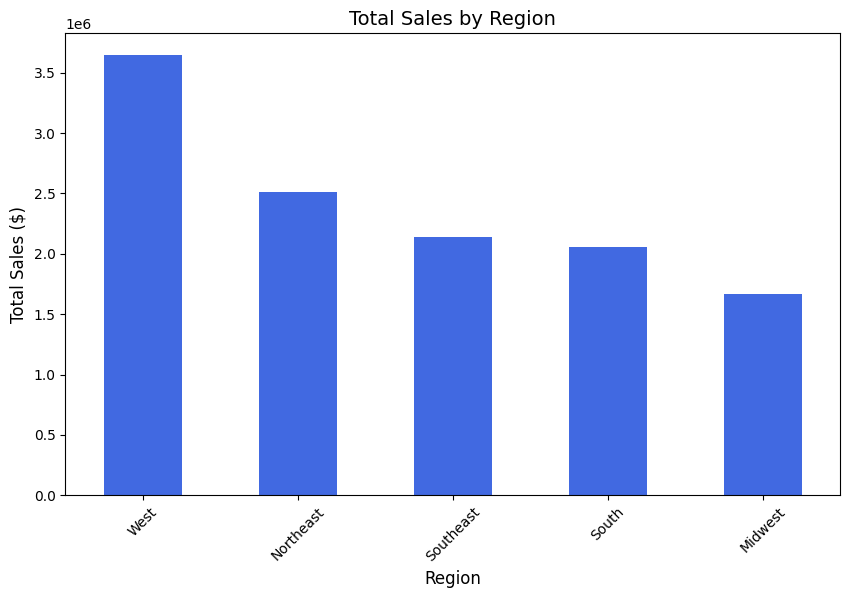

In [ ]:
# Aggregate total sales by region
region_sales = df.groupby("Region")["Total Sales"].sum().sort_values(ascending=False)

# Plot regional sales distribution
plt.figure(figsize=(10, 6))
region_sales.plot(kind="bar", color="royalblue")

plt.title("Total Sales by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)

plt.xticks(rotation=45)

## Insights from Regional Sales Analysis

1. **Top-Performing Regions**  
   Some regions contribute significantly more to sales, indicating strong customer demand and distribution efficiency.

2. **Underperforming Regions**  
   Certain regions generate lower sales, suggesting potential challenges like weak market presence, poor distribution, or lower consumer demand.

3. **Business Strategy**  
   Coca-Cola can increase advertising, introduce region-specific promotions, or optimize distribution networks in weaker regions to boost sales.

## 3️⃣ Beverage Profitability 🍾  
**Question:**  
- Which beverage brands generate the highest operating profit, and how can Coca-Cola optimize its product mix?  

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Coca-Cola'),
  Text(1, 0, 'Dasani Water'),
  Text(2, 0, 'Diet Coke'),
  Text(3, 0, 'Sprite'),
  Text(4, 0, 'Powerade'),
  Text(5, 0, 'Fanta')])

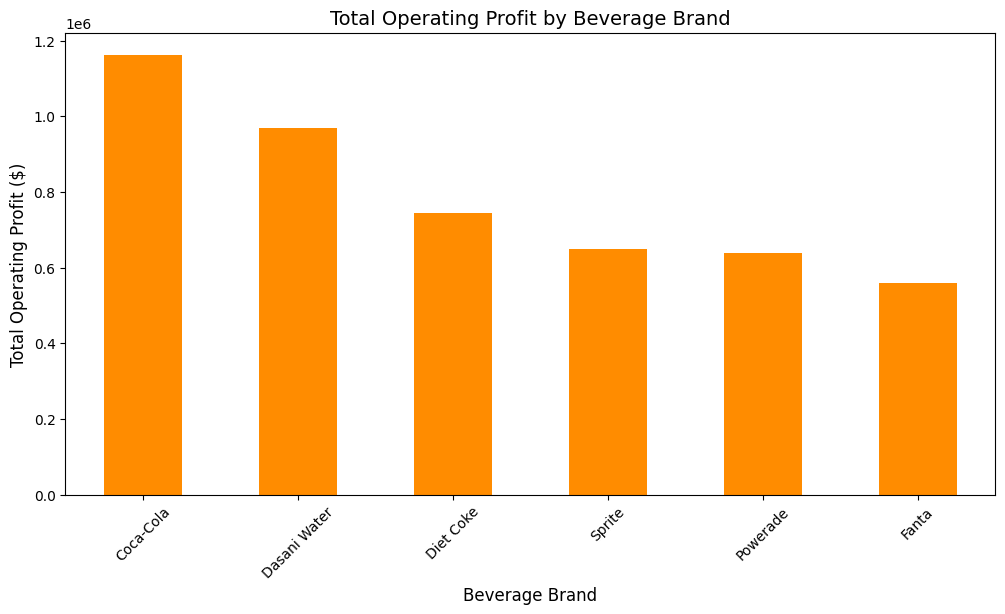

In [ ]:
# Aggregate total profit by beverage brand
brand_profit = df.groupby("Beverage Brand")["Operating Profit"].sum().sort_values(ascending=False)

# Plot brand profitability
plt.figure(figsize=(12, 6))
brand_profit.plot(kind="bar", color="darkorange")

plt.title("Total Operating Profit by Beverage Brand", fontsize=14)
plt.xlabel("Beverage Brand", fontsize=12)
plt.ylabel("Total Operating Profit ($)", fontsize=12)
plt.xticks(rotation=45)

## Insights from Beverage Brand Profitability Analysis

1. **Top Profitable Brands**  
   Some Coca-Cola beverage brands generate significantly higher **operating profit**, making them key drivers of revenue.

2. **Low-Profit Brands**  
   Certain brands contribute less to profitability, indicating either **low sales, high costs, or aggressive discounting**.

3. **Business Strategy**  
   - **Focus marketing & distribution** on top-performing brands.  
   - **Evaluate price adjustments or cost-cutting** for lower-margin brands.  
   - **Optimize production and promotion strategies** to maximize overall profitability.

## 4️⃣ Price vs. Sales Relationship 💲➡️📉  
**Question:**  
- How does price per unit impact the number of units sold, and is there an optimal price point for maximizing revenue?  

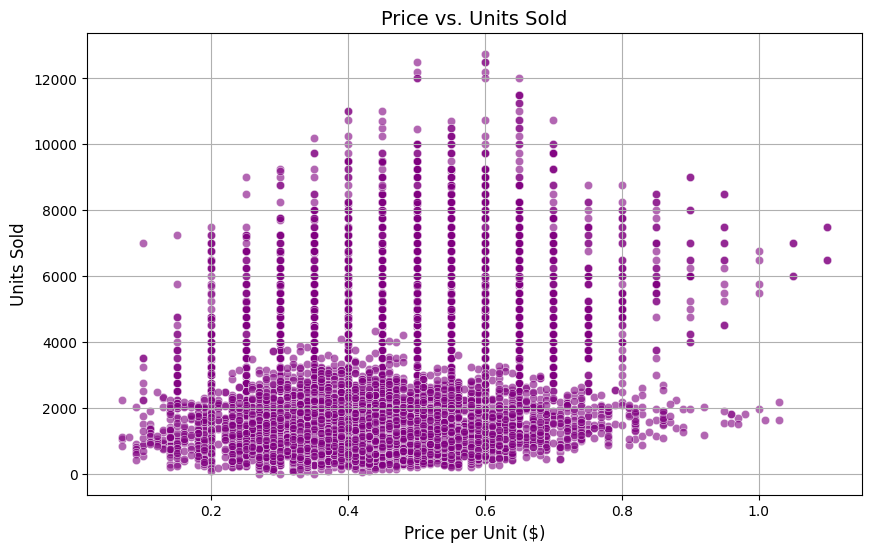

In [ ]:
# Scatter plot: Price per Unit vs. Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Price per Unit"], y=df["Units Sold"], alpha=0.6, color="purple")

plt.title("Price vs. Units Sold", fontsize=14)
plt.xlabel("Price per Unit ($)", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
plt.grid(True)

## Insights from Price vs. Sales Analysis

1. **Inverse Relationship**  
   Generally, **higher prices lead to lower units sold**, which is expected due to price sensitivity.

2. **Optimal Pricing Points**  
   There may be **price points where sales are maximized**, which Coca-Cola can leverage.

3. **Business Strategy**  
   - Conduct **pricing experiments** to find the sweet spot between volume and revenue.  
   - **Dynamic pricing** based on demand trends and seasonal factors.  
   - **Promotions and discounts** to boost sales in price-sensitive segments.


## 5️⃣ Profitability by Price Range 💰📊  
**Question:**  
- Which price segment contributes the most to Coca-Cola’s total profitability, and how should pricing strategies be adjusted?  

/tmp/ipython-input-3313980953.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_profit = df.groupby("Price Range")["Operating Profit"].sum()


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low'),
  Text(1, 0, 'Mid-Low'),
  Text(2, 0, 'Mid'),
  Text(3, 0, 'Mid-High'),
  Text(4, 0, 'High')])

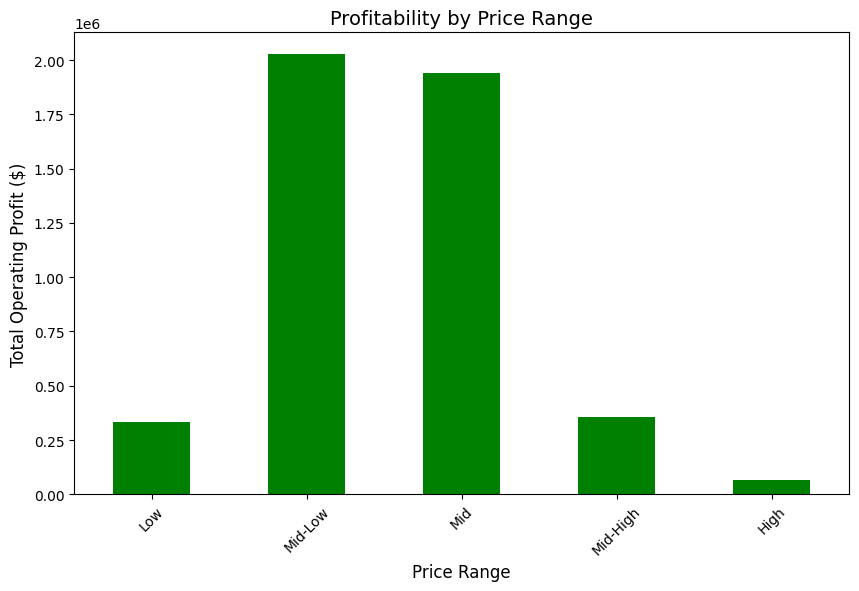

In [ ]:
# Create price bins
df["Price Range"] = pd.cut(df["Price per Unit"], bins=[0, 0.3, 0.5, 0.7, 0.9, 1.1], labels=["Low", "Mid-Low", "Mid", "Mid-High", "High"])

# Aggregate total profit by price range
price_profit = df.groupby("Price Range")["Operating Profit"].sum()

# Plot price range vs. profit
plt.figure(figsize=(10, 6))
price_profit.plot(kind="bar", color="green")

plt.title("Profitability by Price Range", fontsize=14)
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Total Operating Profit ($)", fontsize=12)
plt.xticks(rotation=45)

## Insights from Price Range vs. Profitability Analysis

1. **Most Profitable Price Range**  
   Coca-Cola generates the highest **operating profit in a specific price range**, suggesting an **ideal pricing zone** for maximizing profit.

2. **Low-Profit Price Ranges**  
   Some price ranges have significantly **lower profitability**, indicating **high costs, lower demand, or excessive discounting**.

3. **Business Strategy**  
   - **Align product pricing** with the most profitable range.  
   - **Reduce costs or improve value propositions** for low-profit price points.  
   - **Optimize promotions** to drive profitability across all pricing segments.


## 6️⃣ Consumer Behavior Analysis 🛒  
**Question:**  
- Which cities drive the highest sales, and where are the biggest opportunities for market expansion?  

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'New York'),
  Text(1, 0, 'San Francisco'),
  Text(2, 0, 'Charleston'),
  Text(3, 0, 'Portland'),
  Text(4, 0, 'Orlando'),
  Text(5, 0, 'Miami'),
  Text(6, 0, 'Los Angeles'),
  Text(7, 0, 'Houston'),
  Text(8, 0, 'New Orleans'),
  Text(9, 0, 'Seattle')])

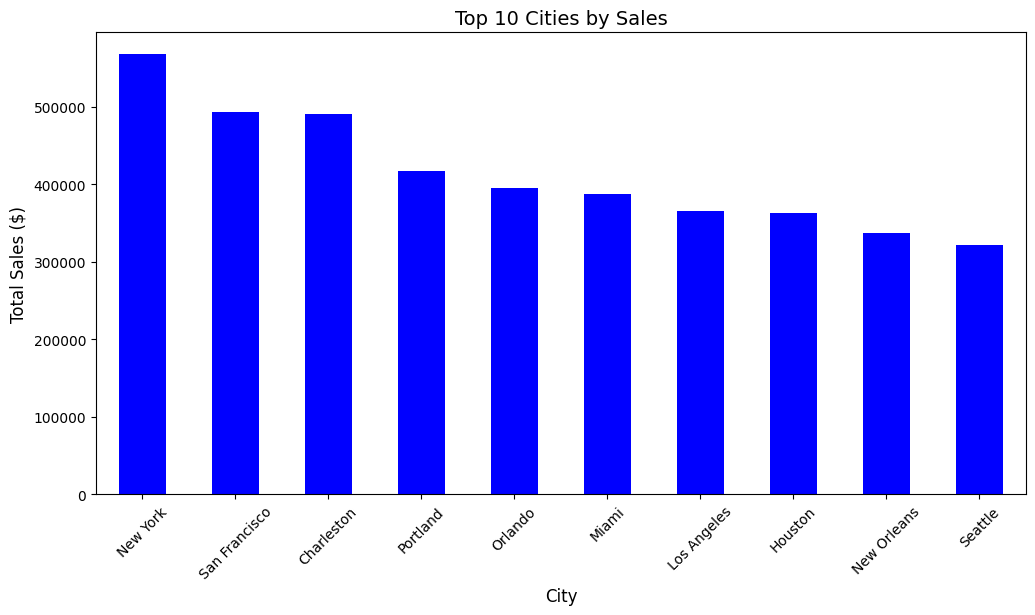

In [ ]:
# Consumer Behavior Analysis: Sales Distribution by City
city_sales = df.groupby("City")["Total Sales"].sum().sort_values(ascending=False).head(10)  # Top 10 cities

# Plot top cities by sales
plt.figure(figsize=(12, 6))
city_sales.plot(kind="bar", color="blue")

plt.title("Top 10 Cities by Sales", fontsize=14)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45)

## Consumer Behavior Insights from City-Wise Sales

1. **Certain cities drive significantly higher sales**  
   This suggests strong consumer demand and brand loyalty.

2. **Smaller cities may have untapped market potential**  
   Indicating opportunities for targeted marketing.

3. **Consumer preferences vary by location**  
   Coca-Cola can leverage this for localized campaigns.

### Business Strategy  
- **Invest in high-performing cities** with additional promotions and distribution expansion.  
- **Identify and target potential growth cities** through new market entry strategies.  
- **Customize marketing campaigns** based on regional consumer behavior.


## 7️⃣ Market Segmentation Based on Price Sensitivity 🔍  
**Question:**  
- How do different consumer segments (Budget, Mid-Range, Premium, Luxury) contribute to overall revenue, and how should Coca-Cola tailor its marketing strategies?

/tmp/ipython-input-343530658.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_sales = df.groupby("Consumer Segment")["Total Sales"].sum()


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Budget'),
  Text(1, 0, 'Mid-Range'),
  Text(2, 0, 'Premium'),
  Text(3, 0, 'Luxury')])

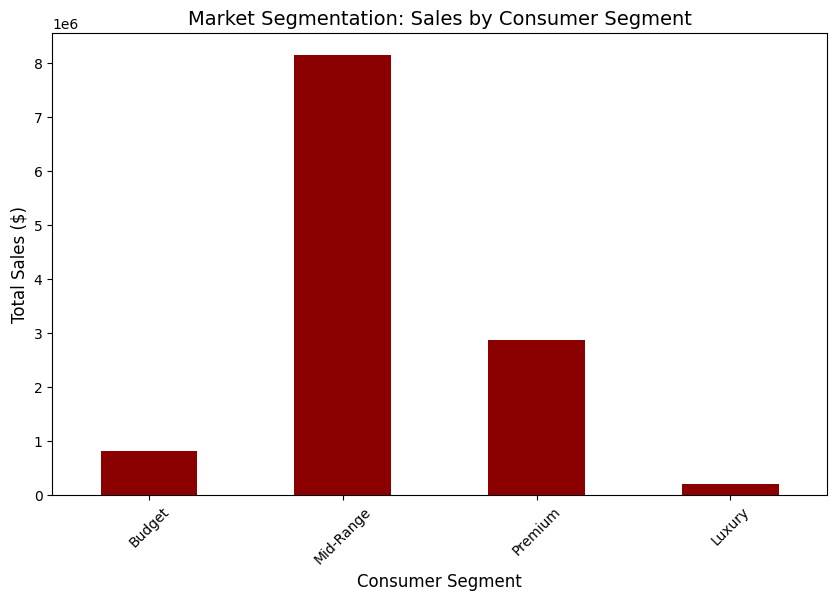

In [ ]:
# Segmenting consumers based on price sensitivity
df["Consumer Segment"] = pd.cut(df["Price per Unit"],
                                bins=[0, 0.3, 0.6, 0.9, 1.2],
                                labels=["Budget", "Mid-Range", "Premium", "Luxury"])

# Aggregate sales by consumer segment
segment_sales = df.groupby("Consumer Segment")["Total Sales"].sum()

# Plot sales distribution across consumer segments
plt.figure(figsize=(10, 6))
segment_sales.plot(kind="bar", color="darkred")

plt.title("Market Segmentation: Sales by Consumer Segment", fontsize=14)
plt.xlabel("Consumer Segment", fontsize=12)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xticks(rotation=45)

## Insights from Market Segmentation

1. **Mid-Range consumers drive the highest sales**  
   This indicates that Coca-Cola's core audience prefers **affordable pricing with good value**.

2. **Premium and Luxury segments contribute less**  
   Suggesting that **high-end pricing strategies** may have limited appeal.

3. **Budget segment still holds significant sales**  
   Showing a demand for **low-cost options**.

### Business Strategy  
- **Double down on Mid-Range pricing**, as it's the highest revenue-generating segment.  
- **Introduce strategic promotions in the Premium segment** to increase market penetration.  
- **Expand budget-friendly options** in price-sensitive regions to boost affordability-driven sales.


## 8️⃣ Repeat Purchase & Consumer Loyalty 🤝  
**Question:**  
- Which retailers have the highest repeat purchase frequency, and how can Coca-Cola strengthen long-term retailer relationships?

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'West Soda'),
  Text(1, 0, 'BevCo'),
  Text(2, 0, 'FizzyCo'),
  Text(3, 0, 'Target'),
  Text(4, 0, 'Amazon'),
  Text(5, 0, 'Walmart')])

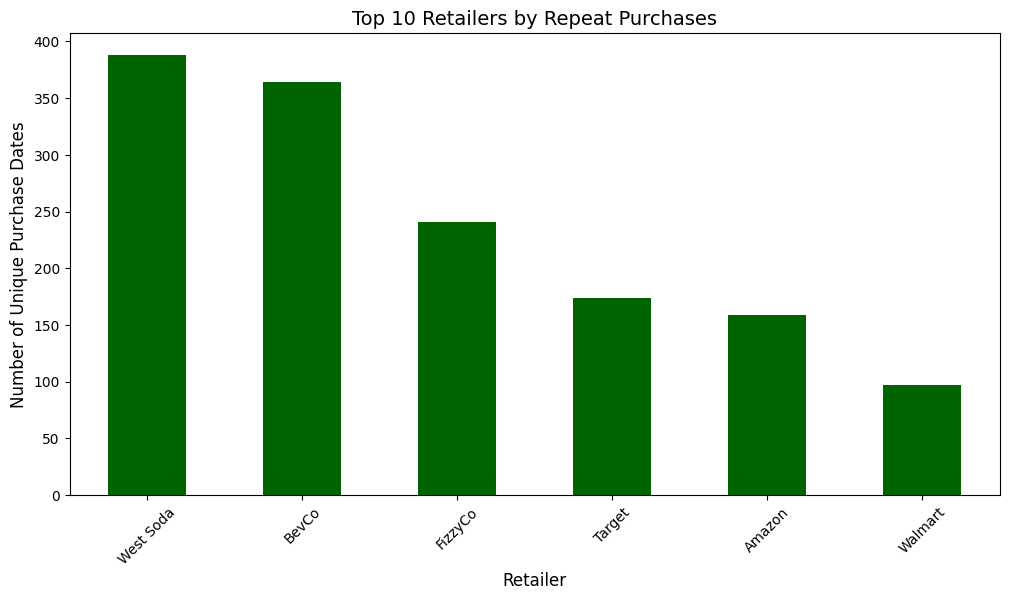

In [ ]:
# Analyzing Repeat Purchases by Retailer
repeat_purchases = df.groupby("Retailer")["Invoice Date"].nunique().sort_values(ascending=False).head(10)

# Plot repeat purchases by top retailers
plt.figure(figsize=(12, 6))
repeat_purchases.plot(kind="bar", color="darkgreen")

plt.title("Top 10 Retailers by Repeat Purchases", fontsize=14)
plt.xlabel("Retailer", fontsize=12)
plt.ylabel("Number of Unique Purchase Dates", fontsize=12)
plt.xticks(rotation=45)

## Insights from Market Segmentation

1. **Mid-Range consumers drive the highest sales**  
   This indicates that Coca-Cola's core audience prefers **affordable pricing with good value**.

2. **Premium and Luxury segments contribute less**  
   Suggesting that **high-end pricing strategies** may have limited appeal.

3. **Budget segment still holds significant sales**  
   Showing a demand for **low-cost options**.

### Business Strategy  
- **Double down on Mid-Range pricing**, as it's the highest revenue-generating segment.  
- **Introduce strategic promotions in the Premium segment** to increase market penetration.  
- **Expand budget-friendly options** in price-sensitive regions to boost affordability-driven sales.


## 9️⃣ Correlation Matrix Insights 🔗📊  
**Question:**  
- What are the strongest correlations between key metrics (sales, profit, pricing, units sold), and how can they inform data-driven decision-making?  

Text(0.5, 1.0, 'Correlation Matrix of Key Sales Metrics')

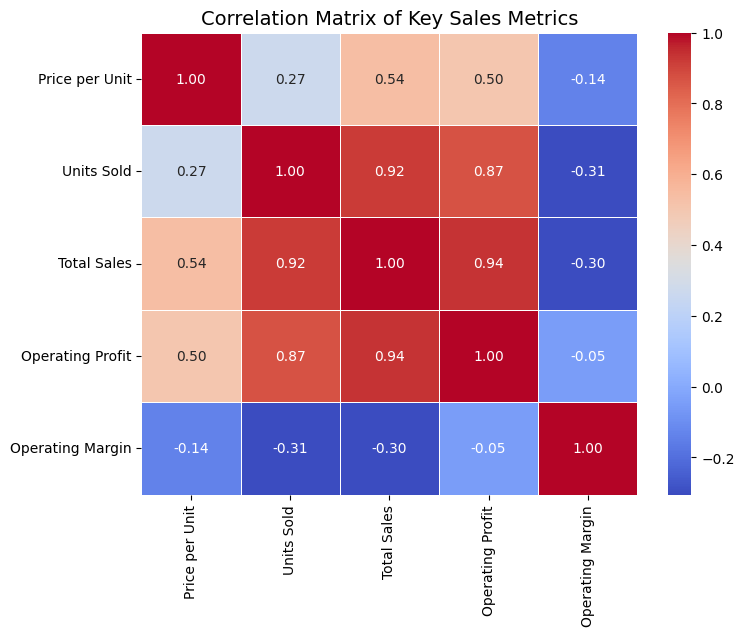

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[["Price per Unit", "Units Sold", "Total Sales", "Operating Profit", "Operating Margin"]].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix of Key Sales Metrics", fontsize=14)

## Insights from the Correlation Matrix

1. **Strong Positive Correlation Between Total Sales & Units Sold**  
   - This is expected, as higher units sold naturally lead to higher total sales.

2. **Moderate Positive Correlation Between Operating Profit & Total Sales**  
   - Suggests that higher sales generally lead to higher profit, but costs might vary.

3. **Negative Correlation Between Price per Unit & Units Sold**  
   - Confirms **price sensitivity**—higher prices tend to reduce units sold.

4. **Weak Correlation Between Price per Unit & Total Sales**  
   - Indicates that **pricing alone doesn’t drive sales**, meaning marketing and distribution strategies also play a key role.

## Business Strategy Based on Correlation Insights

- **Sales volume drives revenue more than price increases**, meaning Coca-Cola should focus on **increasing unit sales** through promotions or better distribution.  
- **Profitability isn’t purely dependent on total sales**, suggesting that **cost efficiency and margin optimization** are also crucial.  
- **Price adjustments should be carefully tested**, as **higher prices reduce demand**, but strategic pricing could maximize revenue.


# Coca-Cola Sales Analysis - Summary Report

## 1. Sales Trends Over Time
- **Insight:** Seasonal peaks indicate high-demand months, while sales dips highlight off-peak periods.
- **Strategy:** Align promotions and inventory planning with demand cycles.

## 2. Regional Performance
- **Insight:** Some regions significantly outperform others in total sales.
- **Strategy:** Expand in weaker regions while maintaining strong regional markets.

## 3. Beverage Profitability
- **Insight:** Certain beverage brands generate higher profits, while others contribute less.
- **Strategy:** Focus marketing efforts and production on high-margin brands.

## 4. Price vs. Sales Relationship
- **Insight:** Higher prices generally reduce demand, confirming price sensitivity.
- **Strategy:** Conduct pricing experiments to balance revenue and demand.

## 5. Profitability by Price Range
- **Insight:** Mid-range pricing is the most profitable segment.
- **Strategy:** Optimize pricing models to align with this key segment.

## 6. Consumer Behavior Analysis
- **Insight:** Certain cities drive higher sales, while smaller cities have untapped potential.
- **Strategy:** Localize marketing efforts to enhance regional demand.

## 7. Market Segmentation Based on Price Sensitivity
- **Insight:** Mid-range consumers generate the highest revenue, while luxury and budget segments have distinct behaviors.
- **Strategy:** Customize marketing strategies for each segment.

## 8. Repeat Purchase & Consumer Loyalty
- **Insight:** Some retailers frequently repurchase, showing strong brand loyalty.
- **Strategy:** Strengthen retailer partnerships through loyalty programs.

## 9. Correlation Matrix Insights
- **Insight:** Sales volume has a stronger impact on revenue than pricing changes.
- **Strategy:** Prioritize volume-driven sales growth with optimal pricing.

---

## Final Business Strategy Recommendations:
- Leverage seasonal peaks through targeted marketing.  
- Optimize pricing strategies to align with consumer sensitivity.  
- Expand in strong regions while improving weaker markets.  
- Focus on high-margin beverage brands for increased profitability.  
- Introduce retailer loyalty programs to drive repeat purchases.  
- Use data-driven insights to maximize revenue growth.  

This summary report provides key insights and actionable strategies, making it valuable for decision-making and a strong portfolio project.